<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter07/cutout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified


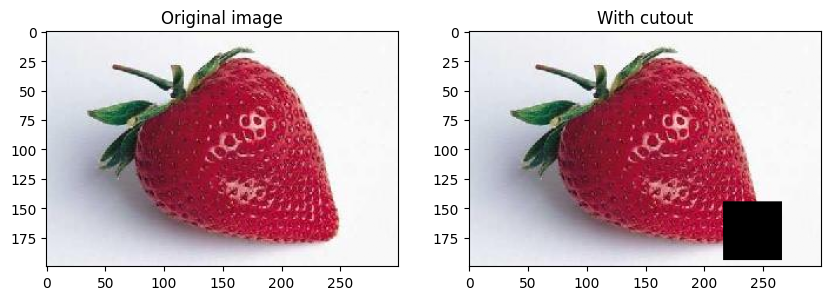

In [60]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

np.random.seed(84)

# Root directory for the dataset
CALTECH_ROOT = "./data"

# Create a transform to convert the image to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Load an image from the Caltech101 dataset
caltech101 = torchvision.datasets.Caltech101(
    root=CALTECH_ROOT, download=True, transform=transform
)
image, _ = caltech101[7824]  # Get an image


def apply_cutout(image_tensor, cutout_size=50):
    """
    Applies the cutout augmentation on the given image tensor.

    Parameters:
    - image_tensor (torch.Tensor): The input image in the form of a PyTorch tensor.
                                   Expected shape: [channels, height, width]
    - cutout_size (int): The side length of the square cutout patch.

    Returns:
    - torch.Tensor: Image tensor after applying cutout.
    """

    # Extract image dimensions
    channels, height, width = image_tensor.shape

    # Randomly select the center of the cutout patch
    center_y = np.random.randint(height)
    center_x = np.random.randint(width)

    # Calculate the coordinates of the top-left and bottom-right corners of the cutout patch
    top_left_y = np.clip(center_y - cutout_size // 2, 0, height)
    bottom_right_y = np.clip(center_y + cutout_size // 2, 0, height)

    top_left_x = np.clip(center_x - cutout_size // 2, 0, width)
    bottom_right_x = np.clip(center_x + cutout_size // 2, 0, width)

    # Set pixel values in the cutout patch to 0 (black)
    image_tensor[:, top_left_y:bottom_right_y, top_left_x:bottom_right_x] = 0

    return image_tensor


# Display original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
plt.title("Original image")

# Apply cutout and display
cutout_image = apply_cutout(image.clone(), cutout_size=50)
plt.subplot(1, 2, 2)
plt.imshow(np.transpose(cutout_image.numpy(), (1, 2, 0)))
plt.title("With cutout")
plt.show()